In [120]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 군집화
from sklearn.model_selection import train_test_split            # train / test 데이터셋 분리
from sklearn.decomposition import PCA                           # 차원 축소
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # for 표준화, 정규화 
from sklearn.cluster import KMeans                              # 비지도 학습 - 클러스터링 ; Kmeans

In [3]:
file_path1 = "/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Feature_Result_csv/20220325-155320.csv"                       # 피처값 csv 파일 경로
#file_path2 = "feature_result_songs.csv"
df_soundwave = pd.read_csv(file_path1, index_col=0)                      # classic 장르 피처값 csv 읽기
#df2 = pd.read_csv(file_path2, index_col=0)                      # songs from youtube 장르 피처값 csv 읽기
#df_soundwave = pd.concat([df1,df2], axis=0, ignore_index=True)  # 인덱스 초기화 / 위 아래로 데이터 프레임 합치기
df_soundwave.head()

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,blues.00021.wav,2755.434327,429.592861,1046.748840,540.054654,0.327042,1.129839,5189.501953,258.398438,1830.788929,...,10.856279,2.202138,1.095310,45.731815,-42.664536,-0.780010,12.189150,0.817654,0.300143,99.384014
1,blues.00022.wav,3469.748131,397.000759,1156.070496,560.664619,1.051891,1.124727,5673.999023,247.631836,2170.053545,...,10.924349,2.228990,1.204073,52.893820,-35.879383,-0.608485,11.974702,1.862670,0.749557,99.384014
2,blues.00024.wav,2851.339646,433.586661,1120.387619,420.021450,-0.050562,0.717949,5221.801758,269.165039,2325.102607,...,6.651611,0.143240,-0.305405,24.187828,-43.491180,-1.596130,9.138107,1.272281,-0.672218,103.359375
3,blues.00020.wav,3205.333473,687.159992,1389.955510,320.782562,4.333950,1.310306,6513.793945,645.996094,3005.773491,...,9.701139,1.884183,0.988186,33.259712,-22.959686,1.508026,8.592778,0.657548,0.346329,135.999178
4,blues.00025.wav,2304.512028,406.256758,1109.569627,372.486717,0.134566,0.764230,4974.169922,355.297852,2243.569767,...,8.717470,0.223954,-0.263630,29.286180,-30.642246,-0.533179,8.226832,0.332313,-0.034046,92.285156


In [4]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
df_scaler = df_soundwave.iloc[:, 1:]    # song 컬럼 제외하고 표준화 진행
scaler.fit(df_scaler)                   # 데이터 범위가 [0, 1]이 되도록 최솟값은 0, 최댓값은 1을 갖도록 모델을 학습
df_scaled = scaler.transform(df_scaler) # [0, 1] 범위에 따르도록 데이터 값을 ndarray 형식으로 받기

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
columns = df_soundwave.columns[1:]      # 밑에 변환할 때 리스트 값으로 넣어줘야함
df_sw = pd.DataFrame(data=df_scaled, columns=columns)

In [20]:
df_sw.head()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,0.250194,0.172022,0.165258,0.308687,0.023951,0.267775,0.428728,0.043716,0.151116,0.361181,...,0.387805,0.372271,0.652761,0.646518,0.315465,0.548031,0.451146,0.187315,0.408737,0.289941
1,0.338423,0.158971,0.193965,0.321958,0.034543,0.267180,0.478070,0.041894,0.193186,0.358427,...,0.391615,0.375680,0.689649,0.752061,0.450733,0.552939,0.439216,0.300310,0.553651,0.289941
2,0.262040,0.173621,0.184595,0.231401,0.018434,0.219812,0.432018,0.045537,0.212413,0.327791,...,0.152480,0.110879,0.177692,0.329035,0.298985,0.524682,0.281421,0.236473,0.095198,0.323077
3,0.305763,0.275160,0.255380,0.167503,0.082500,0.288790,0.563596,0.109290,0.296818,0.294388,...,0.323155,0.331904,0.616429,0.462723,0.708299,0.613492,0.251085,0.170003,0.423630,0.595142
4,0.194498,0.162678,0.181754,0.200794,0.021139,0.225201,0.406798,0.060109,0.202302,0.274245,...,0.268101,0.121126,0.191860,0.404167,0.555140,0.555093,0.230728,0.134837,0.300977,0.230769


In [31]:
df_sw[['tempo']].values

1204

In [46]:
# MinMaxScaler() Ver
from sklearn.model_selection import train_test_split

# train-test 분리 => 사실 어떤 기준으로 분류해야 하는지 모르겠음...ㅎ
# 난 tempo를 y_train으로 놓긴 했는데... 왜 비지도 학습에서 train / test 데이터셋을 나누지?
X = df_sw.iloc[:, :-1]
Y = df_sw[['tempo']].values
test_size = 0.2
random_state = 2022

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state) 

# train-validation 분리
#X2_train, X2_val, y2_train, y_val = train_test_split(X_train, y_train)

In [47]:
X_train.shape, y_train.shape, X2_train.shape, y2_train.shape

((963, 192), (963, 1), (722, 192), (722, 1))

In [48]:
# 정규화 - MinMaxScaler - train 데이터만 진행
n_components = 2   
random_state = 2022

pca = PCA(n_components=n_components, random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)        
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

#scatterPlot(X_train_PCA, y_train, "PCA") -> 시각화 방법을 ... 알아보자 ! 핳

In [49]:
X_train_PCA

,0,1
742,0.958187,0.293341
143,1.728008,0.091930
857,-1.526124,0.108957
264,-0.622100,0.865328
1199,0.451899,-0.451474
...,...,...
951,-0.580003,0.439374
240,2.185299,0.556798
624,-0.368943,0.274435
173,0.945327,-0.504747


In [50]:
sum(pca.explained_variance_ratio_) # 정규화 - 설명된 분산 비율 (전체 고유값 중에서 원하는 고유값의 비율) // 클수록 정보 손실 작음

0.392181316082068

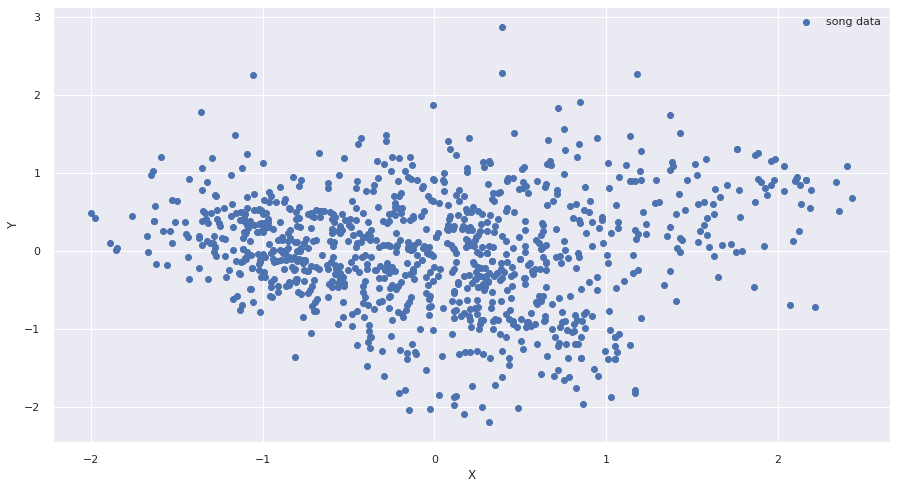

In [124]:
# pca(2차원 축소) - 시각화
# MinMaxScaler Ver - 정규화
plt.figure(figsize=(15,8))
plt.scatter(X_train_PCA.iloc[:,0], X_train_PCA.iloc[:,1], label='song data')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

In [52]:
# 정규화 - MinMaxScaler - 전체 데이터
n_components = 2   
random_state = 2022

pca1 = PCA(n_components=n_components, random_state=random_state)

X_PCA = pca1.fit_transform(df_sw)        
X_PCA = pd.DataFrame(data=X_PCA, index=df_sw.index)

X_PCA_inverse = pca.inverse_transform(X_PCA)
X_PCA_inverse = pd.DataFrame(data=X_PCA_inverse, index=df_sw.index)

# scatterPlot(X_train_PCA, y_train, "PCA") -> 시각화 방법을 ... 알아보자 ! 핳

In [53]:
X_PCA

,0,1
0,0.486966,0.786722
1,0.304633,0.849809
2,0.820969,0.564011
3,0.731290,0.109000
4,0.716646,0.729150
...,...,...
1199,0.419485,-0.466001
1200,0.270586,0.033078
1201,-0.163438,0.058182
1202,0.074974,-0.658326


In [54]:
sum(pca1.explained_variance_ratio_)

0.3926299375272997

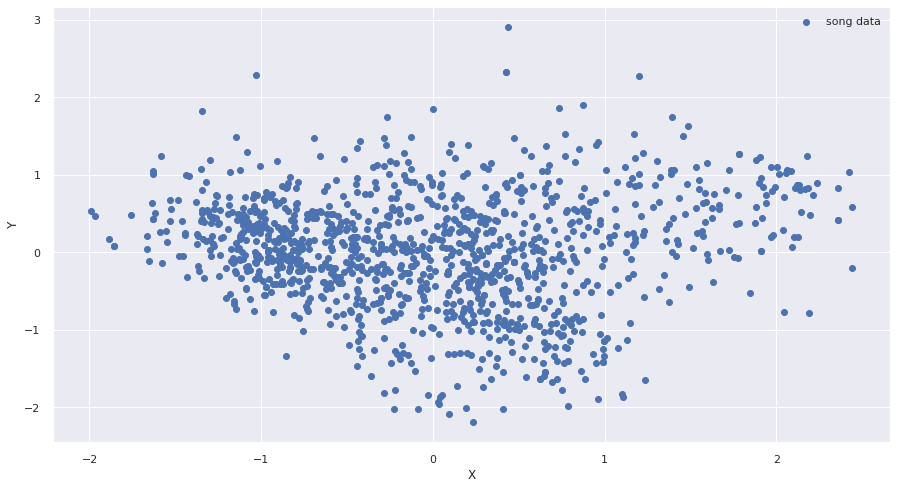

In [125]:
# pca(2차원 축소) - 시각화
# MinMaxScaler Ver - 정규화
plt.figure(figsize=(15,8))
plt.scatter(X_PCA.iloc[:,0], X_PCA.iloc[:,1], label='song data')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

### Kmeans - Kmeans++

#### 최적의 k 찾기 - elbow method

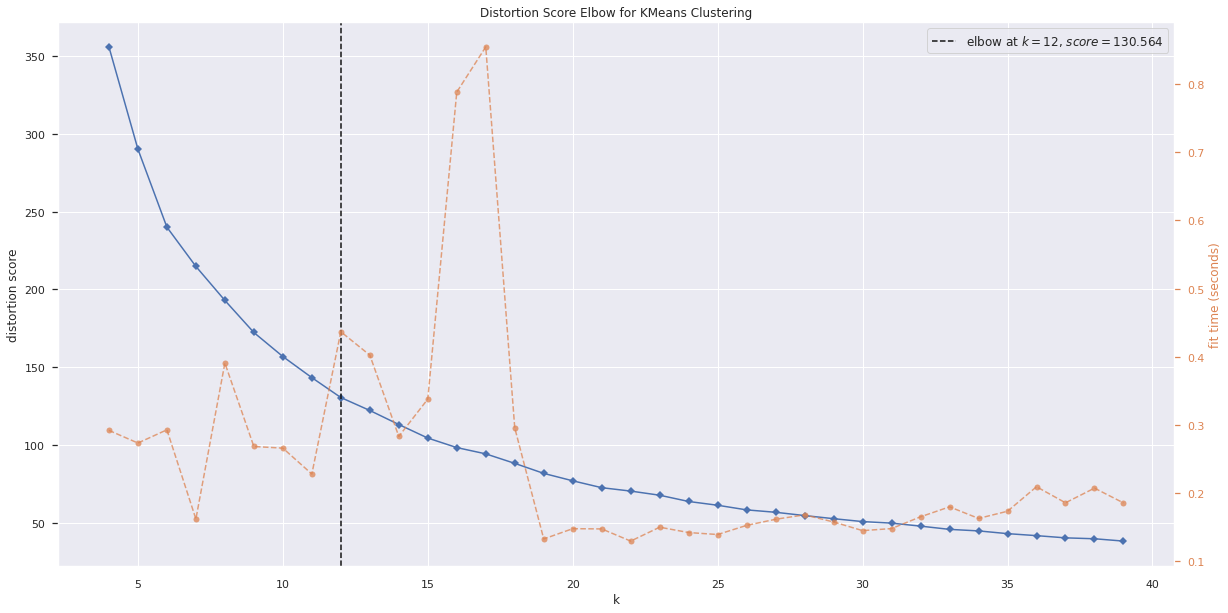

In [132]:
# X_train_PCA 대상으로 최적의 k 찾기
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++', n_clusters=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(4,40))

visualizer.fit(X_train_PCA)        # Fit the data to the visualizer
visualizer.show();                  # Finalize and render the figure

> - k = 12개가 적당한 것으로 보임

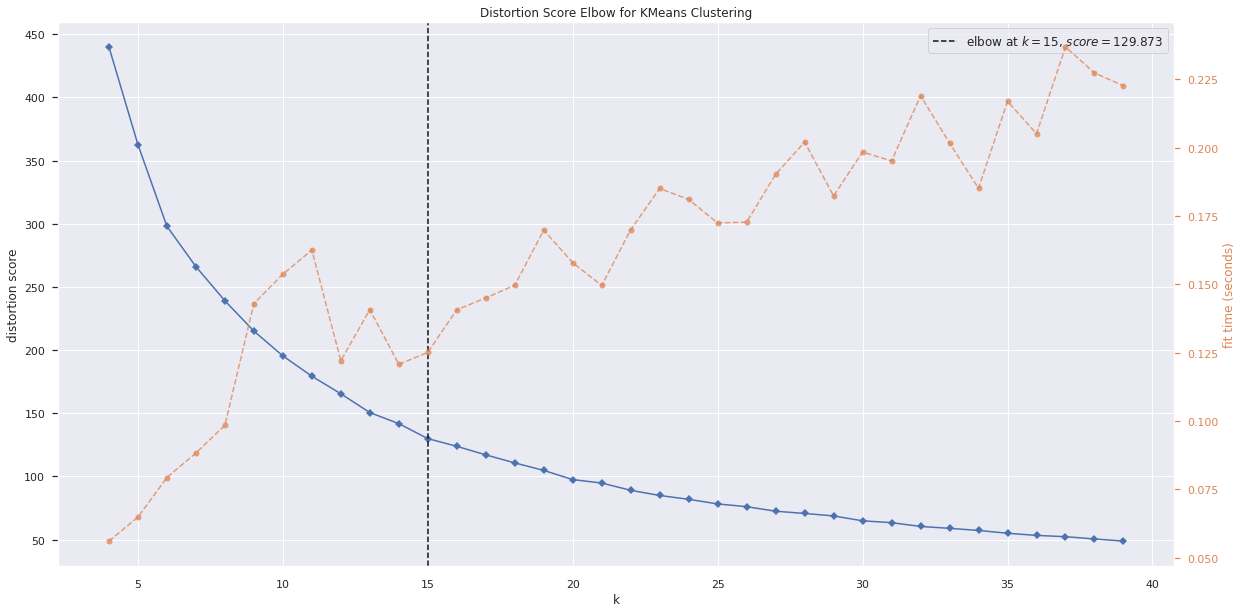

In [131]:
# X_PCA(전체 데이터) 대상으로 최적의 k 찾기
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++', n_clusters=10, random_state=2022)
visualizer = KElbowVisualizer(model, k=(4,40))

visualizer.fit(X_PCA)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

> - k 갯수 : 15개가 적당한 것으로 보임

#### k-평균 : 군집 수 변화에 따른 관성
- k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는가

In [135]:
# X_train_PCA 대상으로 k-평균 관성 계산

n_init = 10
max_iter = 300
tol = 0.0001
verbose = 0
random_state = 2022
algorithm = 'auto'

kmeans_inertia = pd.DataFrame(data=[], index=range(2,21), columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, 
                    max_iter=max_iter, tol=tol, verbose=verbose, random_state=random_state, algorithm=algorithm)
    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kmeans_inertia.loc[n_clusters] = kmeans.inertia_

In [136]:
kmeans_inertia

,inertia
2,759.206274
3,464.182872
4,355.783323
5,290.09048
6,240.058962
7,214.751377
8,192.082108
9,172.691534
10,157.633811
11,143.533172


In [133]:
# X_PCA(전체 데이터) 대상으로 k-평균 관성 계산

n_init = 10
max_iter = 300
tol = 0.0001
verbose = 0
random_state = 2022
algorithm = 'auto'

kmeans_inertia_a = pd.DataFrame(data=[], index=range(2,21), columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, 
                    max_iter=max_iter, tol=tol, verbose=verbose, random_state=random_state, algorithm=algorithm)
    cutoff = 99
    kmeans.fit(X_PCA.loc[:,0:cutoff])
    kmeans_inertia_a.loc[n_clusters] = kmeans.inertia_

In [134]:
kmeans_inertia_a

,inertia
2,946.749927
3,574.762639
4,439.918402
5,362.628408
6,297.952084
7,266.003005
8,238.999949
9,215.021477
10,195.440712
11,179.287709


> - k 갯수 : 12 ~ 15개가 적당한 것으로 보임
    - 참고 사이트 : https://eunsukimme.github.io/ml/2019/12/16/K-Means/

### 클러스터링 진행
    - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_ : 각 군집 중심점 좌표. 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있습니다.
    - n_iter_ : 수행된 이동 횟수
> - k = 12

In [217]:
n_clusters = 12
random_state=2022

km12 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km12.fit(X_PCA)

KMeans(n_clusters=12, random_state=2022)

In [218]:
# 중심점(centroids) 위치
centers12 = km12.cluster_centers_
centers12

array([[ 0.43668789, -1.61299302],
       [ 0.34833458, -0.20609484],
       [ 1.1833253 ,  0.14731722],
       [-1.15498693,  0.46373514],
       [ 0.87372098,  1.22249976],
       [-0.95473659, -0.20110172],
       [ 0.61940492, -0.89998423],
       [ 0.18443753,  0.4978567 ],
       [ 1.92785293,  0.70579492],
       [-0.39228528,  1.10317356],
       [-0.28648334, -0.81770357],
       [-0.39710537,  0.02348215]])

In [221]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster12'] = km12.fit_predict(X_PCA)

In [222]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster12
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,0.632032,0.436896,41.290916,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,11
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,1.393292,-0.680192,27.008787,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,10
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-0.097106,-0.007306,31.206330,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,7


In [223]:
# 클러스터 레이블 확인
new_labels12 = km12.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels12, axis=0, return_counts=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 array([ 58, 139,  76, 159,  56, 142, 102, 110,  67,  58,  98, 139]))

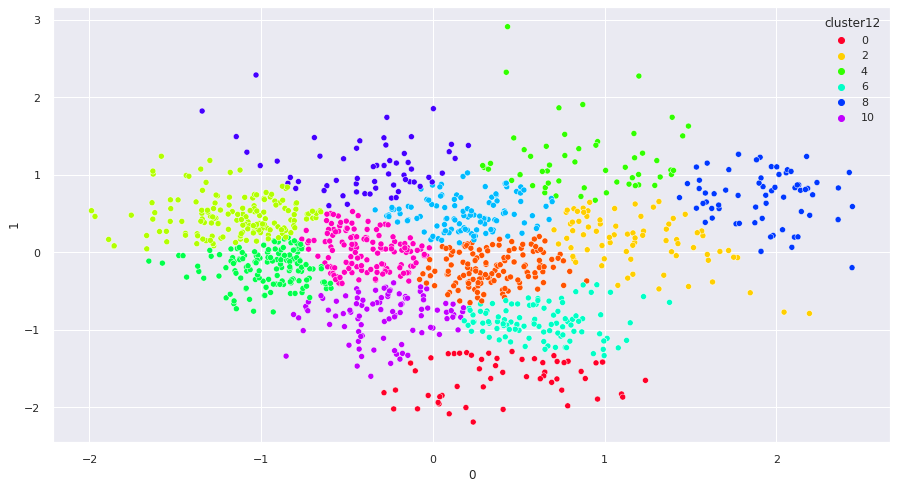

In [224]:
# k = 12 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster12', data=df_soundwave, palette='gist_rainbow');

> - k = 13

In [225]:
n_clusters = 13
random_state=2022

km13 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km13.fit(X_PCA)

KMeans(n_clusters=13, random_state=2022)

In [226]:
# 중심점(centroids) 위치
centers13 = km13.cluster_centers_
centers13

array([[-4.03781298e-01, -4.87416740e-01],
       [ 1.24948177e+00, -1.10411507e-03],
       [ 4.43136415e-01,  6.49749863e-01],
       [ 7.83857437e-01, -1.27612394e+00],
       [-1.19697698e+00,  4.92226766e-01],
       [ 1.91238968e+00,  7.22546480e-01],
       [-9.68772397e-01, -1.52690145e-01],
       [ 3.04716668e-01, -3.65311500e-02],
       [ 1.00535776e+00,  1.37754059e+00],
       [ 3.43979005e-01, -7.21980675e-01],
       [-3.39687513e-01,  1.11583850e+00],
       [-4.18995927e-01,  2.74142587e-01],
       [-7.36643037e-02, -1.49228125e+00]])

In [227]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster13'] = km13.fit_predict(X_PCA)

In [228]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster12,cluster13
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,0.436896,41.290916,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,11,11
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,-0.680192,27.008787,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,10,9
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-0.007306,31.206330,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,7,11


In [229]:
# 클러스터 레이블 확인
new_labels13 = km13.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels13, axis=0, return_counts=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32),
 array([121,  70,  93,  68, 141,  67, 143, 140,  37, 105,  56, 114,  49]))

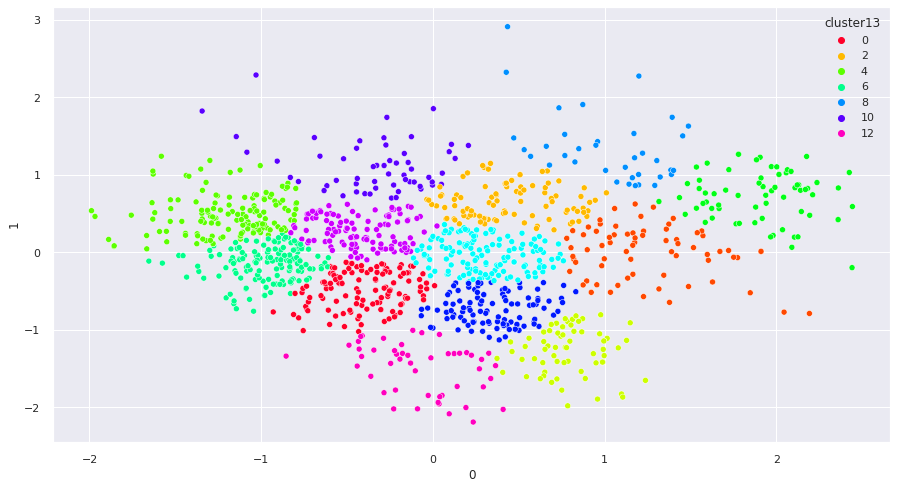

In [230]:
# k = 13 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster13', data=df_soundwave, palette='gist_rainbow');

> - k = 14

In [231]:
n_clusters = 14
random_state=2022

km14 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km14.fit(X_PCA)

KMeans(n_clusters=14, random_state=2022)

In [233]:
# 중심점(centroids) 위치
centers14 = km14.cluster_centers_
centers14

array([[-1.25021193,  0.32278945],
       [ 1.62784268, -0.01845534],
       [-0.4577023 ,  0.27796411],
       [-0.0833266 , -1.46603311],
       [ 0.37384003, -0.47616692],
       [-0.92209323, -0.19422277],
       [-0.03133673,  0.97733665],
       [ 0.93561013,  1.29179158],
       [ 0.70023456, -1.20313997],
       [ 1.92289921,  0.82788366],
       [-0.36803503, -0.49289661],
       [-1.02565049,  0.91807264],
       [ 0.85086357,  0.31540378],
       [ 0.19524343,  0.21917765]])

In [234]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster14'] = km14.fit_predict(X_PCA)

In [235]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster12,cluster13,cluster14
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,41.290916,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,11,11,2
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,27.008787,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,10,9,4
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,31.206330,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,7,11,2


In [236]:
# 클러스터 레이블 확인
new_labels14 = km14.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels14, axis=0, return_counts=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=int32),
 array([116,  45, 109,  50, 136, 134,  71,  46,  93,  54, 118,  51,  75,
        106]))

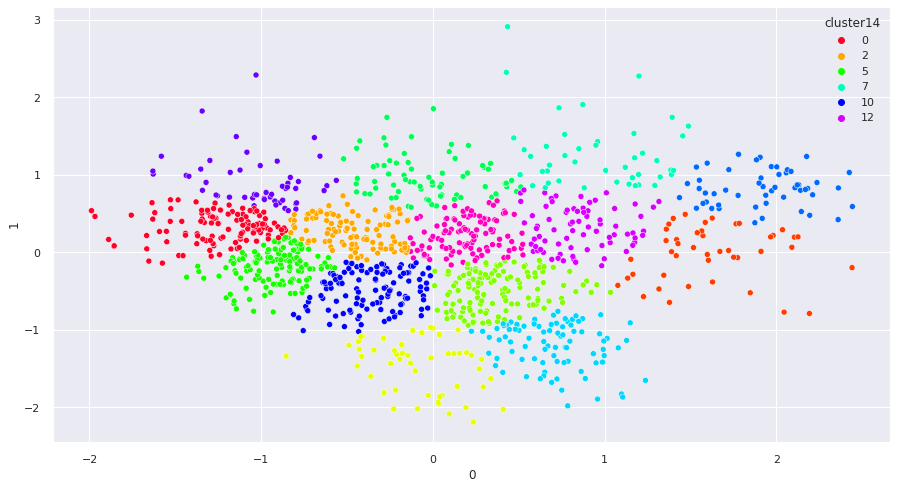

In [237]:
# k = 14 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster14', data=df_soundwave, palette='gist_rainbow');

> - k = 15

In [238]:
n_clusters = 15
random_state=2022

km15 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km15.fit(X_PCA)

KMeans(n_clusters=15, random_state=2022)

In [239]:
# 중심점(centroids) 위치
centers15 = km15.cluster_centers_
centers15

array([[ 0.73478459,  0.61276596],
       [-0.64551794,  0.26648543],
       [ 0.32491716, -0.79626842],
       [ 1.86852531,  0.82987045],
       [-0.37878873, -0.48032836],
       [ 0.91315825,  1.53760259],
       [-0.94765336, -0.24193885],
       [-1.05315171,  0.94775424],
       [-0.10755609,  1.02572558],
       [ 0.77369487, -1.28371619],
       [ 1.52037965,  0.00756115],
       [ 0.45673471, -0.19163451],
       [ 0.0152356 ,  0.2569502 ],
       [-1.28257868,  0.32752281],
       [-0.09445036, -1.5286443 ]])

In [240]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster15'] = km15.fit_predict(X_PCA)

In [241]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster12,cluster13,cluster14,cluster15
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,11,11,2,12
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,10,9,4,2
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,7,11,2,12


In [242]:
# 클러스터 레이블 확인
new_labels15 = km15.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels15, axis=0, return_counts=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int32),
 array([ 75, 109,  90,  61, 118,  27, 113,  45,  59,  70,  55, 118, 114,
        106,  44]))

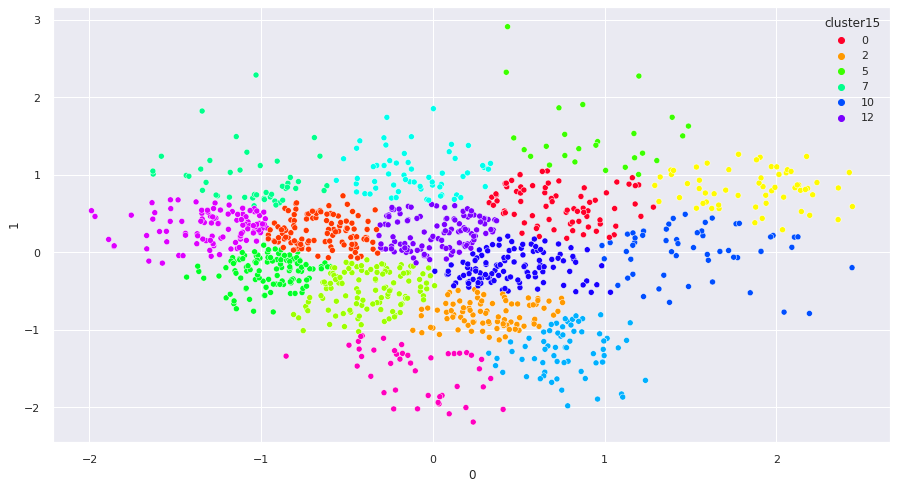

In [243]:
# k = 15 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster15', data=df_soundwave, palette='gist_rainbow');

In [220]:
# 데이터프레임에서 컬럼명 삭제하기
#df_soundwave.drop(['cluster12','cluster13','cluster14','cluster15'], axis=1, inplace=True)

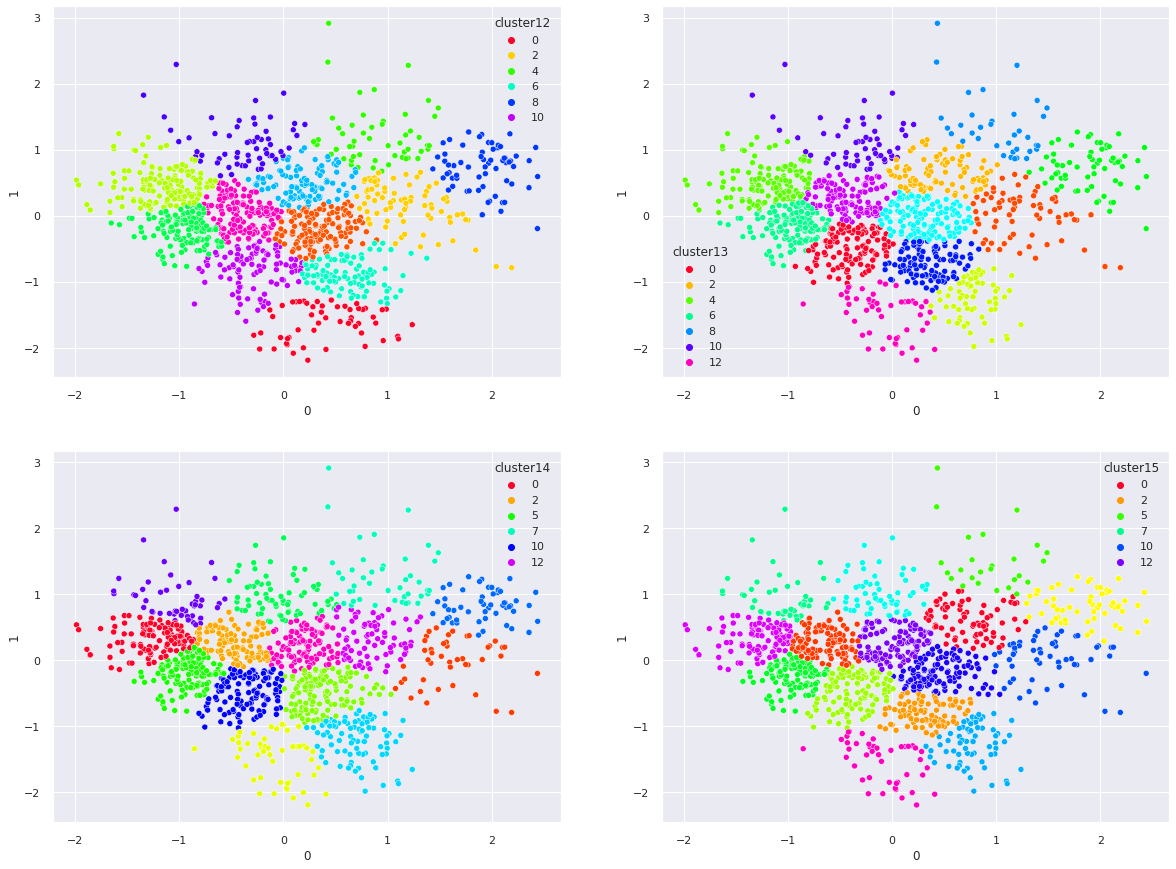

In [244]:
# 결과값 비교하기 (시각화 그래프 활용)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

sns.scatterplot(x=x, y=y, hue='cluster12', data=df_soundwave, palette='gist_rainbow', ax=ax[0][0])
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster13', data=df_soundwave, palette='gist_rainbow', ax=ax[0][1]);
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster14', data=df_soundwave, palette='gist_rainbow', ax=ax[1][0]);
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster15', data=df_soundwave, palette='gist_rainbow', ax=ax[1][1]);
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

- 정확도 계산
    - 실루엣 점수
        - 모든 데이터에 대한 실루엣 계수의 평균
        - `(b-a) / max(a,b)`
            - a는 동일한 클러스터 내 다른 데이터와 자기 자신 데이터와의 평균 거리입니다(클러스터 내부의 평균 거리). 
            - b는 자기가 속한 클러스터를 제외하고 가장 가까운 클러스터의 데이터까지 평균 거리입니다. 계수는 −1에서 1까지 바뀔 수 있습니다. 
> - `+1`에 가까우면 b 즉 다른 클러스터와 멀면서, a 자기가 속한 클러스터 내 데이터들과 가깝고 `잘 뭉쳐져있다`는 뜻이고, `−1`에 가깝다면, 반대이기 때문에 `잘못된 클러스터에 할당`되었다는 의미입니다.

In [273]:
from sklearn.metrics import silhouette_score

silhouette_score(X_PCA, km12.labels_)

0.3381746825612702

In [274]:
silhouette_score(X_PCA, km13.labels_)

0.3423939396671664

In [275]:
silhouette_score(X_PCA, km14.labels_)

0.33650865142857905

In [276]:
silhouette_score(X_PCA, km15.labels_)

0.3414643318390421

> - 정확도 높지 않음 
    - k = 7 ~ 10개로 다시 클러스터링 진행

> - k = 7

In [249]:
n_clusters = 7
random_state=2022

km7 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km7.fit(X_PCA)

KMeans(n_clusters=7, random_state=2022)

In [250]:
# 중심점(centroids) 위치
centers7 = km7.cluster_centers_
centers7

array([[-0.61885496, -0.38068767],
       [ 0.44014128, -0.19361402],
       [ 0.67781339,  1.00658038],
       [ 0.41928025, -1.21110723],
       [ 1.73459037,  0.50858505],
       [-0.19646427,  0.4966071 ],
       [-1.12947901,  0.39775429]])

In [251]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster7'] = km7.fit_predict(X_PCA)

In [252]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster12,cluster13,cluster14,cluster15,cluster7
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,3.242226,9.922538,0.505130,0.671343,143.554688,11,11,2,12,5
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,4.046974,6.830245,0.075743,0.327824,161.499023,10,9,4,2,1
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-1.844921,9.352575,0.876417,-0.038484,107.666016,7,11,2,12,5


In [253]:
# 클러스터 레이블 확인
new_labels7 = km7.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels7, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([226, 205,  99, 169, 110, 179, 216]))

> - k = 8

In [254]:
n_clusters = 8
random_state=2022

km8 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km8.fit(X_PCA)

KMeans(random_state=2022)

In [255]:
# 중심점(centroids) 위치
centers8 = km8.cluster_centers_
centers8

array([[ 0.21222198,  1.12170558],
       [-0.00335654, -0.66227814],
       [-0.11033971,  0.24254657],
       [ 1.72467177,  0.65401318],
       [-1.12766248,  0.49258527],
       [ 0.55914087, -1.3040293 ],
       [ 0.74190111, -0.00213645],
       [-0.83801576, -0.23009936]])

In [256]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster8'] = km8.fit_predict(X_PCA)

In [257]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster12,cluster13,cluster14,cluster15,cluster7,cluster8
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,9.922538,0.505130,0.671343,143.554688,11,11,2,12,5,2
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,6.830245,0.075743,0.327824,161.499023,10,9,4,2,1,1
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,9.352575,0.876417,-0.038484,107.666016,7,11,2,12,5,2


In [258]:
# 클러스터 레이블 확인
new_labels8 = km8.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels8, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 99, 173, 186, 111, 181, 122, 141, 191]))

> - k = 9

In [259]:
n_clusters = 9
random_state=2022

km9 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km9.fit(X_PCA)

KMeans(n_clusters=9, random_state=2022)

In [260]:
# 중심점(centroids) 위치
centers9 = km9.cluster_centers_
centers9

array([[-0.83078053, -0.20343706],
       [ 0.85591021,  0.89636306],
       [ 0.55337279, -1.28338459],
       [-0.13753564, -0.71198585],
       [-0.2117714 ,  1.19279373],
       [ 0.58864106, -0.18831877],
       [-1.13823709,  0.47056383],
       [ 1.82887186,  0.52082206],
       [-0.08212926,  0.27558351]])

In [261]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster9'] = km9.fit_predict(X_PCA)

In [262]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster12,cluster13,cluster14,cluster15,cluster7,cluster8,cluster9
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,0.505130,0.671343,143.554688,11,11,2,12,5,2,8
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,0.075743,0.327824,161.499023,10,9,4,2,1,1,3
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,0.876417,-0.038484,107.666016,7,11,2,12,5,2,8


In [263]:
# 클러스터 레이블 확인
new_labels9 = km9.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels9, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([195,  90, 127, 136,  61, 156, 174,  92, 173]))

> - k = 10

In [264]:
n_clusters = 10
random_state=2022

km10 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km10.fit(X_PCA)

KMeans(n_clusters=10, random_state=2022)

In [265]:
# 중심점(centroids) 위치
centers10 = km10.cluster_centers_
centers10

array([[ 0.55986322, -1.28647032],
       [-1.14732724,  0.45770987],
       [ 0.4522258 , -0.25347818],
       [ 0.72217927,  0.84655091],
       [-0.82869153, -0.20646155],
       [-0.1167982 ,  0.26566535],
       [ 1.4782356 ,  0.04795305],
       [-0.18964743, -0.76529273],
       [ 1.83725075,  0.88114943],
       [-0.26288001,  1.20018821]])

In [266]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster10'] = km10.fit_predict(X_PCA)

In [267]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_skew,tempo,cluster12,cluster13,cluster14,cluster15,cluster7,cluster8,cluster9,cluster10
1201,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,0.671343,143.554688,11,11,2,12,5,2,8,5
1202,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,0.327824,161.499023,10,9,4,2,1,1,3,7
1203,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-0.038484,107.666016,7,11,2,12,5,2,8,5


In [268]:
# 클러스터 레이블 확인
new_labels10 = km10.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels10, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([125, 174, 148,  90, 182, 178,  63, 122,  64,  58]))

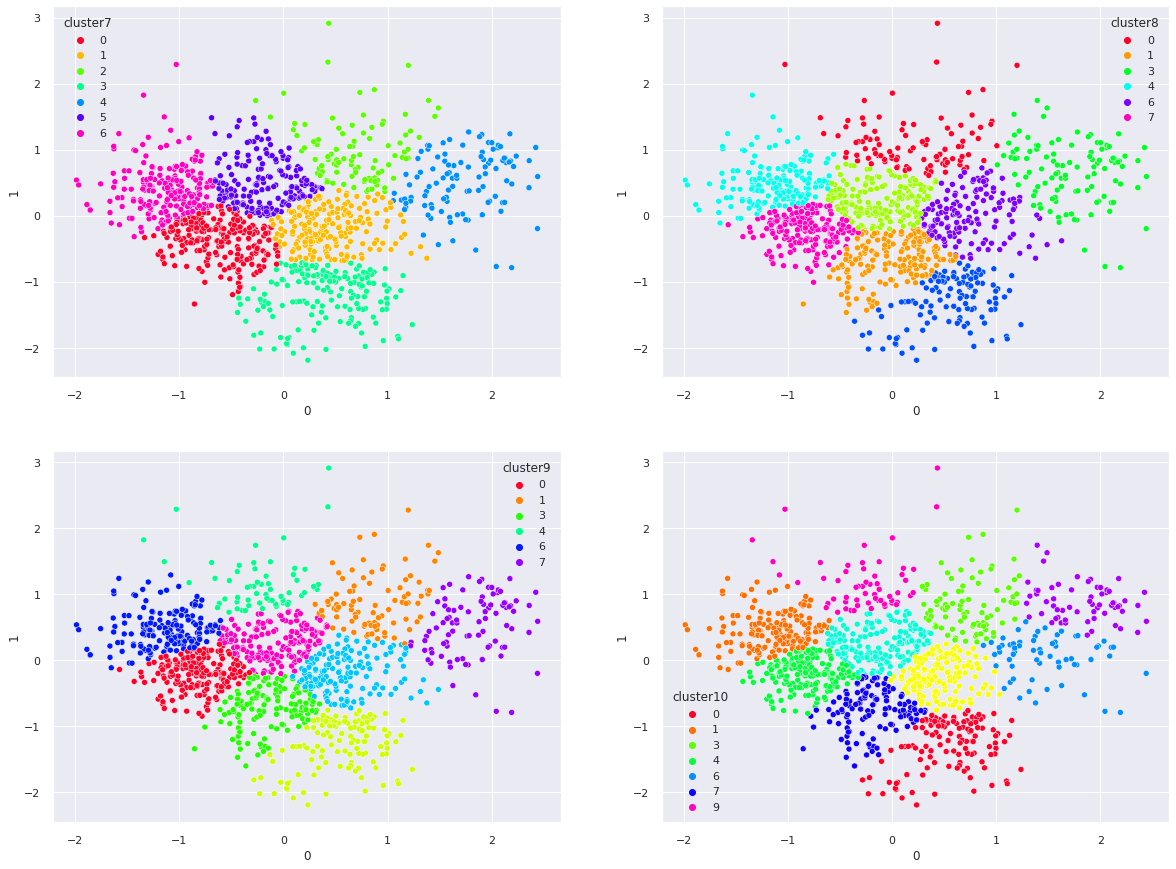

In [269]:
# 결과값 비교하기 (시각화 그래프 활용)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

sns.scatterplot(x=x, y=y, hue='cluster7', data=df_soundwave, palette='gist_rainbow', ax=ax[0][0])
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster8', data=df_soundwave, palette='gist_rainbow', ax=ax[0][1]);
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster9', data=df_soundwave, palette='gist_rainbow', ax=ax[1][0]);
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster10', data=df_soundwave, palette='gist_rainbow', ax=ax[1][1]);
#plt.scatter(centers12[:, 2], centers12[:, 3], c='red', alpha=0.5, s=150)

- 정확도 계산

In [272]:
from sklearn.metrics import silhouette_score

silhouette_score(X_PCA, km7.labels_)

0.3524539114098486

In [277]:
silhouette_score(X_PCA, km8.labels_)

0.34144170729997764

In [278]:
silhouette_score(X_PCA, km9.labels_)

0.3430497100709303

In [279]:
silhouette_score(X_PCA, km10.labels_)

0.3472211661578867

> - 정확도 높지 않음
    - 더 많은 피처값으로 해당 과정 진행해봐야 할 듯함...!

- 참고 사이트
    - 비지도 학습_군집 : https://subinium.github.io/MLwithPython-3-5/
    - kmeans 코드 : https://todayisbetterthanyesterday.tistory.com/60
    - kmeans 설명 : https://hanawithdata.tistory.com/entry/K-means-Clustering-with-Python
    - kmeans 정확도 검사 : https://box-world.tistory.com/62